In [1]:
import pandas as pd
import scipy.stats as s
import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize'] = [20, 15]
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = '~/data/pcap/caida_2016_small.csv'

df = pd.read_csv(filename)
df

,ts,src,sport,dst,dport,len,crc
0,0.000000,81.124.179.179,58353,43.36.155.207,80,52,36307
1,0.000001,111.205.70.7,27357,65.42.243.7,80,52,48745
2,0.000001,64.174.248.115,62402,3.248.117.75,80,60,48575
3,0.000004,117.73.38.64,60110,1.32.245.9,443,1454,18497
4,0.000006,43.253.8.43,61048,153.193.117.49,80,64,35325
...,...,...,...,...,...,...,...
1830251,3.656332,109.147.8.94,49239,1.152.57.43,9339,75,13257
1830252,3.656336,112.151.168.7,56391,1.96.193.24,443,40,34519
1830253,3.656338,153.193.161.173,55305,3.253.232.107,443,52,55290
1830254,3.656338,116.164.35.207,50533,1.37.237.70,9339,87,30397


In [12]:
sum(1 for _,g in df.groupby(['src','dst','dport']) if len(g) >= 30)

8401

In [3]:
# gaps between each packet
df['ts'].diff().dropna()


1          0.000001
2          0.000000
3          0.000003
4          0.000002
5          0.000007
             ...   
1830251    0.000000
1830252    0.000004
1830253    0.000002
1830254    0.000000
1830255    0.000002
Name: ts, Length: 1830255, dtype: float64

In [23]:
grouped = df[:100000].groupby(['src', 'dst', 'dport'])

def weib(x,n,a):
    return (a/n) * (x/n)**(a-1) * np.exp(-(x/n)**a)

for dst, group in grouped:
    if len(group) < 100:
        continue
    gaps = group['ts'].diff().dropna() * 1000000
#    print(' '.join([str(int(g)) for g in gaps]))

    p = s.weibull_min.fit(gaps, floc=0, fscale=1)
    print(f"{p[0]:.4f}  {len(group)}")

0.2112  270
0.2148  282
0.2708  315
0.3095  102
0.2904  500
0.3423  528
0.2021  140
0.1429  203
0.1871  172
0.1555  180
0.1312  126
0.4917  117
0.1660  137
0.1409  203
1.0000  113
1.0000  119
0.1998  303
1.0000  135
0.1784  199
0.1149  159
1.0000  139
1.0000  100
1.0000  126
1.0000  137
1.0000  129
0.1771  109
0.1229  112
0.1464  293
1.0000  397
1.0000  224
1.0000  103
1.0000  109
0.1848  131
1.0000  168
0.1242  246
1.0000  875
0.2144  120
1.0000  203
0.2411  189
0.2283  198
0.2313  206
1.0000  113
0.2729  724
0.1852  670
1.0000  121
1.0000  132
1.0000  109
0.1288  166
1.0000  230
0.2608  1260
0.1481  152
0.1383  157
0.2017  242
1.0000  102
1.0000  172
1.0000  216
0.1179  103
1.0000  122
0.2357  175
0.2561  412
0.3020  989
0.2729  626
0.2822  237
1.1554  1317
1.0000  129
1.0000  225
0.2533  103
0.3619  926
0.1816  161
0.1191  103
0.1984  184
0.1800  179
1.0000  379
1.0000  369
1.0000  128
0.1485  108
0.1225  107
1.0000  109
0.1819  150
0.1514  101


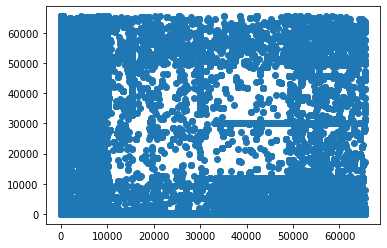

In [29]:
plt.scatter(df['dport'], df['sport'])
plt.show()

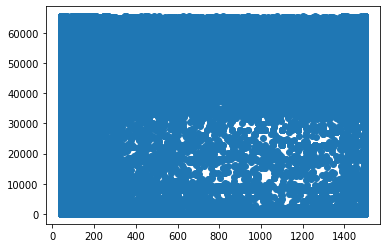

In [33]:
plt.scatter(df['len'], df['dport'])
plt.show()

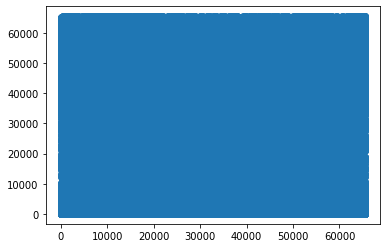

In [34]:
plt.scatter(df['crc'], df['dport'])
plt.show()

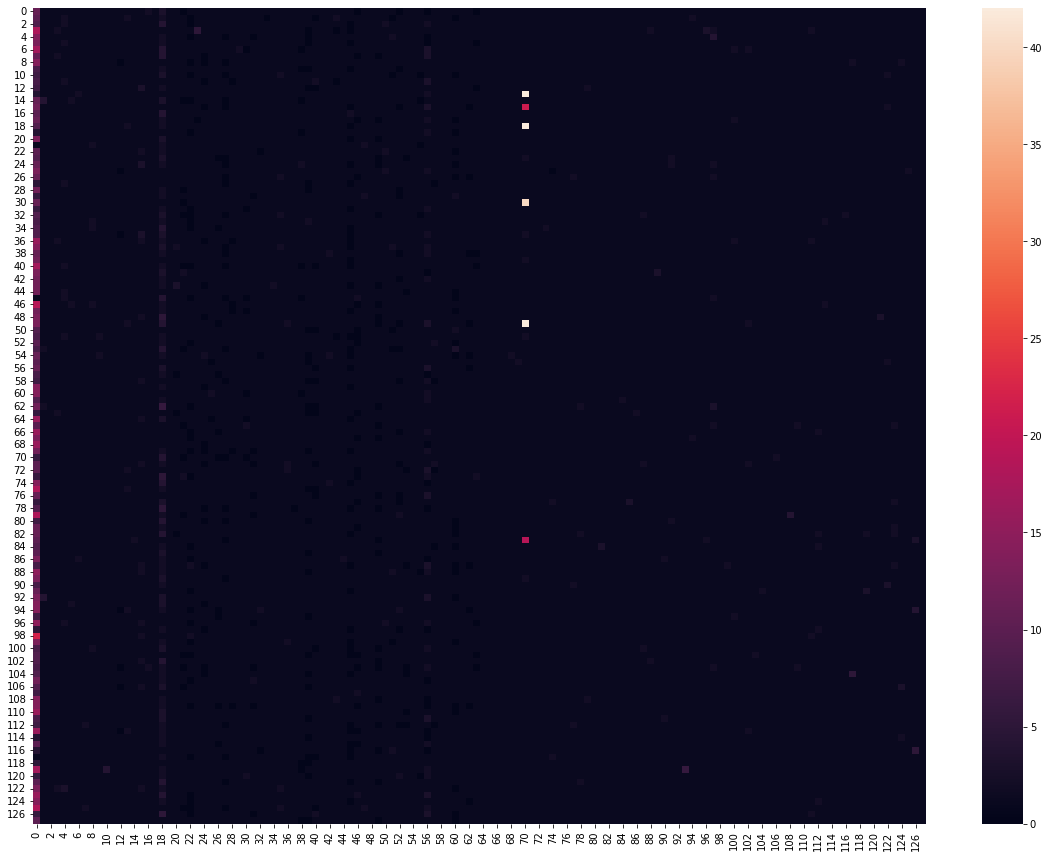

In [12]:
a_size = 128
b_size = 128

arr = np.zeros((a_size, b_size))

for keys, group in df.groupby(['crc', 'dport']):
    a = keys[0] / (2**16 / a_size)
    b = keys[1] / (2**16 / b_size)
#    print(a, b)
    arr[int(a)][int(b)] = len(group)

sns.heatmap(arr)
plt.show()

In [3]:
crcs = {}
for c, group in df.groupby(['src','dst','dport','crc']):
    crcs[c] = len(group)



In [ ]:
codes = sorted(crcs.items(), key=lambda kv: kv[1], reverse=True)

In [ ]:
plt.hist(codes)
plt.show()

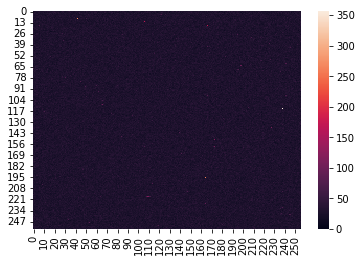

In [5]:
import seaborn as sns

arr = np.zeros((256,256))
for crc, count in codes:
    a = crc[3] >> 8
    b = crc[3] & 255
    arr[a][b] += count

sns.heatmap(arr)
plt.show()

In [10]:
for c, group in df.groupby(['src','dst','dport']):
    if len(group) < 30:
        continue
    avg = sum(line[5] for line in group)/len(group)
    print(avg)

IndexError: string index out of range